In [1]:
import numpy as np
import xarray as xr
import os,errno
import sys
import matplotlib.pyplot as plt
import pandas as pd
import datetime as dt
import salem
import scipy.stats as st
import cartopy.crs as ccrs

dir_data='/Users/ahenny/'
dir2='/Volumes/Extreme Pro/'
dir3='/Volumes/My Passport/'

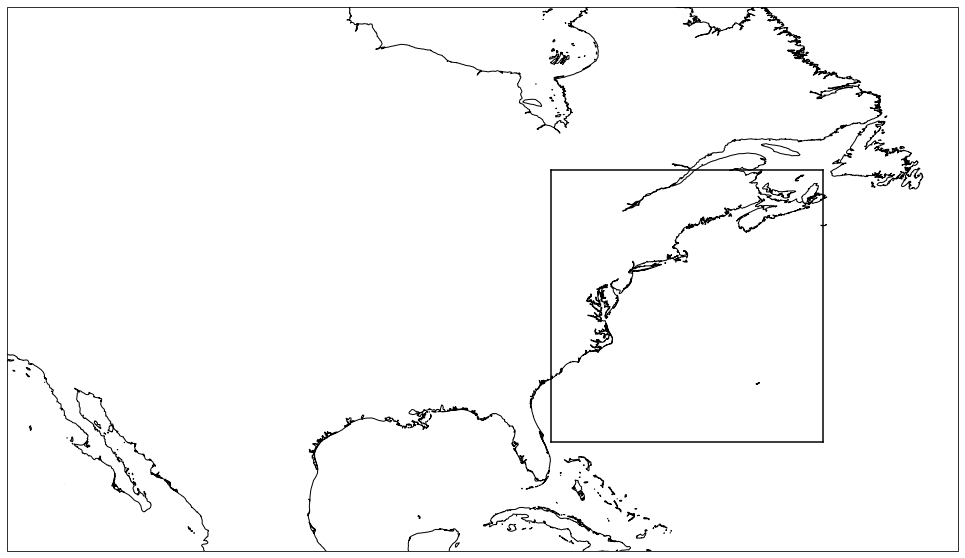

In [92]:
fig=plt.figure(figsize=(20,10))
ax=plt.subplot(1,1,1,projection=ccrs.PlateCarree())
ax.coastlines(resolution='10m')
ax.set_xlim(-120,-50)
ax.set_ylim(20,60)
ax.plot([-80,-80],[28,48],color='k')
ax.plot([-60,-60],[28,48],color='k')
ax.plot([-80,-60],[28,28],color='k')
ax.plot([-80,-60],[48,48],color='k')
plt.show()

In [258]:
lat_min=28
lat_max=48
lon_min=-80
lon_max=-60

ds=xr.open_dataset('/Users/ahenny/Downloads/data.nc')
t2m=ds['t2m'][0,:,:]
land_mask=t2m/t2m
land_mask=land_mask.fillna(0)

lon_east=[x for x in land_mask.longitude.values if x>=180.]
lon_west=[x for x in land_mask.longitude.values if x<180.]
l_east=land_mask.sel(longitude=lon_east)
l_west=land_mask.sel(longitude=lon_west)
l_east['longitude']=[x-360. for x in lon_east]
land_mask=xr.concat([l_east,l_west],dim='longitude')

dk=xr.Dataset()
dk['land']=(('lat','lon'),land_mask.values)
dk.coords['lat']=land_mask.latitude.values
dk.coords['lon']=land_mask.longitude.values

land_mask=dk['land']
    
yrs=np.arange(1980,2002,1)
#yrs=np.arange(2002,2024,1)
for i in range(len(yrs)):
    year=yrs[i]
    print(year)
    ds=xr.open_dataset(dir2+'era5.ar.labels.model.variable.'+str(year)+'.nc')
    lat_range=[x for x in ds.lat.values if lat_min-2<=x<=lat_max+2]
    lon_range=[x for x in ds.lon.values if lon_min-2<=x<=lon_max+2]
    lat_range1=[x for x in ds.lat.values if lat_min-30<=x<=lat_max+30]
    lon_range1=[x for x in ds.lon.values if lon_min-30<=x<=lon_max+30]
    labeled=ds['ar_labeled'].sel(lat=lat_range,lon=lon_range)
    labeled=labeled/labeled
    labeled1=labeled.fillna(0)

    ds1=xr.open_dataset(dir2+'era_5_ivtinterp_'+str(year)+'.nc')
    ds1['lat']=ds.lat.values
    ds1['lon']=ds.lon.values
    ivt_era5=ds1['ivt'].sel(lat=lat_range1,lon=lon_range1)
    
    ds1=xr.open_dataset(dir2+'era_5_iwvinterp_'+str(year)+'.nc')
    ds1['lat']=ds.lat.values
    ds1['lon']=ds.lon.values
    iwv_era5=ds1['iwv'].sel(lat=lat_range1,lon=lon_range1)
    
    ds1=xr.open_dataset(dir2+'era_5_mfcinterp_'+str(year)+'.nc')
    ds1['lat']=ds.lat.values
    ds1['lon']=ds.lon.values
    mfc_era5=ds1['mfc'].sel(lat=lat_range1,lon=lon_range1)
    
    ds1=xr.open_dataset(dir2+'era_5_u850interp_'+str(year)+'.nc')
    ds1['lat']=ds.lat.values
    ds1['lon']=ds.lon.values
    u850_era5=ds1['u'].sel(lat=lat_range1,lon=lon_range1)
    
    ds1=xr.open_dataset(dir2+'era_5_v850interp_'+str(year)+'.nc')
    ds1['lat']=ds.lat.values
    ds1['lon']=ds.lon.values
    v850_era5=ds1['v'].sel(lat=lat_range1,lon=lon_range1)

    ds=xr.open_dataset(dir2+'era5.ar.labels.model.'+str(year)+'.nc')
    lat_range=[x for x in ds.lat.values if lat_min-2<=x<=lat_max+2]
    lon_range=[x for x in ds.lon.values if lon_min-2<=x<=lon_max+2]
    labeled=ds['ar_labeled'].sel(lat=lat_range,lon=lon_range)
    labeled=labeled/labeled
    labeled2=labeled.fillna(0)

    ds=xr.open_dataset(dir2+'era5.ar.labels.model.poleward.'+str(year)+'.nc')
    lat_range=[x for x in ds.lat.values if lat_min-2<=x<=lat_max+2]
    lon_range=[x for x in ds.lon.values if lon_min-2<=x<=lon_max+2]
    labeled=ds['ar_labeled'].sel(lat=lat_range,lon=lon_range)
    labeled=labeled/labeled
    labeled3=labeled.fillna(0)

    
    

    ds=xr.open_dataset(dir2+'merra2.ar.labels.model.variable.'+str(year)+'.nc')
    lat_range=[x for x in ds.lat.values if lat_min-2<=x<=lat_max+2]
    lon_range=[x for x in ds.lon.values if lon_min-2<=x<=lon_max+2]
    lat_range1=[x for x in ds.lat.values if lat_min-30<=x<=lat_max+30]
    lon_range1=[x for x in ds.lon.values if lon_min-30<=x<=lon_max+30]
    labeled=ds['ar_labeled'].sel(lat=lat_range,lon=lon_range)
    labeled=labeled/labeled
    labeled4=labeled.fillna(0)

    ds1=xr.open_dataset(dir2+'merra2.ivt.3hr.model.'+str(year)+'.nc')
    ds1['lat']=ds.lat.values
    ds1['lon']=ds.lon.values
    ivt_merra2=ds1['ivt'][0::2,:,:].sel(lat=lat_range1,lon=lon_range1)
    
    ds1=xr.open_dataset(dir2+'merra2.iwv.3hr.model.'+str(year)+'.nc')
    ds1['lat']=ds.lat.values
    ds1['lon']=ds.lon.values
    iwv_merra2=ds1['iwv'][0::2,:,:].sel(lat=lat_range1,lon=lon_range1)
    
    ds1=xr.open_dataset(dir3+'merra2.u850.6hr.'+str(year)+'.nc')
    ds1['lat']=ds.lat.values
    ds1['lon']=ds.lon.values
    u850_merra2=ds1['u'].sel(lat=lat_range1,lon=lon_range1)
    
    ds1=xr.open_dataset(dir3+'merra2.v850.6hr.'+str(year)+'.nc')
    ds1['lat']=ds.lat.values
    ds1['lon']=ds.lon.values
    v850_merra2=ds1['v'].sel(lat=lat_range1,lon=lon_range1)
    
    ds1=xr.open_dataset(dir2+'merra2.mfc.3hr.model.'+str(year)+'.nc')
    ds1['lat']=ds.lat.values
    ds1['lon']=ds.lon.values
    mfc_merra2=ds1['mfc'][0::2,:,:].sel(lat=lat_range1,lon=lon_range1)
    

    ds=xr.open_dataset(dir2+'merra2.ar.labels.model.'+str(year)+'.nc')
    lat_range=[x for x in ds.lat.values if lat_min-2<=x<=lat_max+2]
    lon_range=[x for x in ds.lon.values if lon_min-2<=x<=lon_max+2]
    labeled=ds['ar_labeled'][0::2,:,:].sel(lat=lat_range,lon=lon_range)
    labeled=labeled/labeled
    labeled5=labeled.fillna(0)

    ds=xr.open_dataset(dir2+'merra2.ar.labels.model.poleward.'+str(year)+'.nc')
    lat_range=[x for x in ds.lat.values if lat_min-2<=x<=lat_max+2]
    lon_range=[x for x in ds.lon.values if lon_min-2<=x<=lon_max+2]
    labeled=ds['ar_labeled'].sel(lat=lat_range,lon=lon_range)
    labeled=labeled/labeled
    labeled6=labeled.fillna(0)

    
    
    
    
    ds=xr.open_dataset(dir2+'jra55.ar.labels.model.variable.'+str(year)+'.nc')
    lat_range=[x for x in ds.lat.values if lat_min-2<=x<=lat_max+2]
    lon_range=[x for x in ds.lon.values if lon_min-2<=x<=lon_max+2]
    lat_range1=[x for x in ds.lat.values if lat_min-30<=x<=lat_max+30]
    lon_range1=[x for x in ds.lon.values if lon_min-30<=x<=lon_max+30]
    labeled=ds['ar_labeled'].sel(lat=lat_range,lon=lon_range)
    labeled=labeled/labeled
    labeled7=labeled.fillna(0)

    ds1=xr.open_dataset(dir3+'jra55_ivt_'+str(year)+'.nc')
    ds1['lat']=ds.lat.values
    ds1['lon']=ds.lon.values
    ivt_jra55=ds1['ivt'].sel(lat=lat_range1,lon=lon_range1)
    
    ds1=xr.open_dataset(dir3+'jra55_iwv_'+str(year)+'.nc')
    ds1['lat']=ds.lat.values
    ds1['lon']=ds.lon.values
    iwv_jra55=ds1['iwv'].sel(lat=lat_range1,lon=lon_range1)
    
    ds1=xr.open_dataset(dir3+'jra55_u850_'+str(year)+'.nc')
    u850_jra55=ds1['u'].interp(lat=ivt_jra55.lat.values,lon=ivt_jra55.lon.values)
    
    ds1=xr.open_dataset(dir3+'jra55_v850_'+str(year)+'.nc')
    v850_jra55=ds1['v'].interp(lat=ivt_jra55.lat.values,lon=ivt_jra55.lon.values)

    ds=xr.open_dataset(dir_data+'jra55.ar.labels.model.'+str(year)+'.nc')
    lat_range=[x for x in ds.lat.values if lat_min-2<=x<=lat_max+2]
    lon_range=[x for x in ds.lon.values if lon_min-2<=x<=lon_max+2]
    labeled=ds['ar_labeled'].sel(lat=lat_range,lon=lon_range)
    labeled=labeled/labeled
    labeled8=labeled.fillna(0)

    ds=xr.open_dataset(dir2+'jra55.ar.labels.model.poleward.'+str(year)+'.nc')
    lat_range=[x for x in ds.lat.values if lat_min-2<=x<=lat_max+2]
    lon_range=[x for x in ds.lon.values if lon_min-2<=x<=lon_max+2]
    labeled=ds['ar_labeled'].sel(lat=lat_range,lon=lon_range)
    labeled=labeled/labeled
    labeled9=labeled.fillna(0)
    
    #####
    
    labeled7_interp=labeled7.interp(lat=labeled1.lat.values,lon=labeled1.lon.values)
    labeled8_interp=labeled8.interp(lat=labeled1.lat.values,lon=labeled1.lon.values)
    labeled9_interp=labeled9.interp(lat=labeled1.lat.values,lon=labeled1.lon.values)

    ivt_jra55_interp=ivt_jra55.interp(lat=ivt_era5.lat.values,lon=ivt_era5.lon.values)
    iwv_jra55_interp=iwv_jra55.interp(lat=ivt_era5.lat.values,lon=ivt_era5.lon.values)
    u850_jra55_interp=u850_jra55.interp(lat=ivt_era5.lat.values,lon=ivt_era5.lon.values)
    v850_jra55_interp=v850_jra55.interp(lat=ivt_era5.lat.values,lon=ivt_era5.lon.values)
    
    labeled2['lat']=labeled1.lat.values
    labeled2['lon']=labeled1.lon.values
    labeled3['lat']=labeled1.lat.values
    labeled3['lon']=labeled1.lon.values
    labeled4['lat']=labeled1.lat.values
    labeled4['lon']=labeled1.lon.values
    labeled5['lat']=labeled1.lat.values
    labeled5['lon']=labeled1.lon.values
    labeled6['lat']=labeled1.lat.values
    labeled6['lon']=labeled1.lon.values

    labeled4['time']=labeled1.time.values
    labeled5['time']=labeled1.time.values
    labeled6['time']=labeled1.time.values

    ivt_merra2['time']=labeled1.time.values
    ivt_era5['time']=labeled1.time.values
    ivt_jra55['time']=labeled1.time.values
    
    iwv_merra2['time']=labeled1.time.values
    iwv_era5['time']=labeled1.time.values
    iwv_jra55['time']=labeled1.time.values
    
    u850_merra2['time']=labeled1.time.values
    u850_era5['time']=labeled1.time.values
    u850_jra55['time']=labeled1.time.values
    
    v850_merra2['time']=labeled1.time.values
    v850_era5['time']=labeled1.time.values
    v850_jra55['time']=labeled1.time.values
    
    mfc_merra2['time']=labeled1.time.values
    mfc_era5['time']=labeled1.time.values
    
    
    blended_sum=(labeled1+labeled2+labeled3+labeled4+labeled5+labeled6+labeled7_interp+labeled8_interp+labeled9_interp)/9.
    lat_range=[x for x in blended_sum.lat.values if lat_min<=x<=lat_max]
    lon_range=[x for x in blended_sum.lon.values if lon_min<=x<=lon_max]
    blended_sum=blended_sum.sel(lat=lat_range,lon=lon_range)

    mean_ivt_all=(ivt_merra2+ivt_era5+ivt_jra55_interp)/3.
    mean_ivt=mean_ivt_all.sel(lat=lat_range,lon=lon_range)
    
    mean_iwv_all=(iwv_merra2+iwv_era5+iwv_jra55_interp)/3.
    mean_u850_all=(u850_merra2+u850_era5+u850_jra55_interp)/3.
    mean_v850_all=(v850_merra2+v850_era5+v850_jra55_interp)/3.
    mean_mfc_all=(mfc_merra2+mfc_era5)/2.
    
    
    ds=xr.open_dataset(dir2+'merra2_gridareas.nc')
    areas=ds['cell_area']/1e6
    areas=areas.interp_like(blended_sum[0,:,:])

    land_sums_list=[]  
    product_list=[]
    land_mask_interp=land_mask.interp_like(blended_sum[0,:,:])

    for j in range(blended_sum.time.size):
        sel=blended_sum[j,:,:]
        land_area=areas.where(sel>=0.5).where(land_mask_interp>=0.5)
        land_sum=land_area.sum().values.tolist()
        land_sums_list.append(land_sum)

        if land_sum>=1e4:
            ivt_ar=mean_ivt[j,:,:].where(sel>=0.5)
            ivt_max=ivt_ar.quantile(0.95,method='linear',skipna=True).values.tolist()
            product_list.append(land_sum*ivt_max**2)
        else:
            product_list.append(0)
            
    zipped=list(zip(np.arange(len(product_list)),product_list))
    sort=sorted(zipped,key=lambda x:x[1])
    indices=[x[0] for x in sort[-5:]]
    print(indices)
    
    ivt_sel=mean_ivt_all[indices,:,:]
    iwv_sel=mean_iwv_all[indices,:,:]
    mfc_sel=mean_mfc_all[indices,:,:]
    u850_sel=mean_u850_all[indices,:,:]
    v850_sel=mean_v850_all[indices,:,:]
    if i==0:
        ivt_concat=ivt_sel
        iwv_concat=iwv_sel
        mfc_concat=mfc_sel
        u850_concat=u850_sel
        v850_concat=v850_sel
    else:
        ivt_concat=xr.concat([ivt_concat,ivt_sel],dim='time')
        iwv_concat=xr.concat([iwv_concat,iwv_sel],dim='time')
        mfc_concat=xr.concat([mfc_concat,mfc_sel],dim='time')
        u850_concat=xr.concat([u850_concat,u850_sel],dim='time')
        v850_concat=xr.concat([v850_concat,v850_sel],dim='time')

1980
[45, 421, 44, 309, 1043]
1981
[693, 166, 355, 692, 167]
1982
[1233, 886, 1263, 15, 680]
1983
[1447, 1448, 1053, 1144, 1313]
1984
[820, 748, 1179, 749, 1077]
1985
[1079, 1075, 1076, 1078, 1077]
1986
[635, 1089, 1018, 311, 1017]
1987
[652, 1285, 357, 359, 358]
1988
[1330, 1329, 992, 994, 993]
1989
[1060, 1056, 1057, 1062, 1061]
1990
[1163, 1, 1107, 1106, 213]
1991
[243, 1046, 1037, 1072, 1071]
1992
[1062, 92, 91, 1268, 1269]
1993
[1030, 1211, 1027, 1028, 1029]
1994
[959, 346, 902, 111, 1327]
1995
[1148, 910, 1260, 1149, 908]
1996
[1086, 788, 75, 1251, 789]
1997
[1085, 210, 1088, 209, 242]
1998
[949, 946, 948, 963, 947]
1999
[1033, 1035, 1036, 1030, 1029]
2000
[556, 693, 692, 1407, 1406]
2001
[161, 1148, 1146, 820, 1147]


In [259]:
dk=xr.Dataset()
dk['ivt_concat']=(('time','lat','lon'),ivt_concat.values)
dk['iwv_concat']=(('time','lat','lon'),iwv_concat.values)
dk['mfc_concat']=(('time','lat','lon'),mfc_concat.values)
dk['u850_concat']=(('time','lat','lon'),u850_concat.values)
dk['v850_concat']=(('time','lat','lon'),v850_concat.values)
dk.coords['time']=ivt_concat.time.values
dk.coords['lat']=ivt_concat.lat.values
dk.coords['lon']=ivt_concat.lon.values
dk.to_netcdf(dir_data+'first_half_fields.nc',mode='w',format='NETCDF4')

In [260]:
ds=xr.open_dataset(dir_data+'first_half_fields.nc')
print(ds)

<xarray.Dataset>
Dimensions:      (time: 110, lat: 160, lon: 129)
Coordinates:
  * time         (time) datetime64[ns] 1980-01-12T06:00:00 ... 2001-10-14T18:...
  * lat          (lat) float64 -2.0 -1.5 -1.0 -0.5 0.5 ... 76.5 77.0 77.5 78.0
  * lon          (lon) float64 -110.0 -109.4 -108.8 ... -31.25 -30.62 -30.0
Data variables:
    ivt_concat   (time, lat, lon) float64 ...
    iwv_concat   (time, lat, lon) float64 ...
    mfc_concat   (time, lat, lon) float64 ...
    u850_concat  (time, lat, lon) float64 ...
    v850_concat  (time, lat, lon) float64 ...


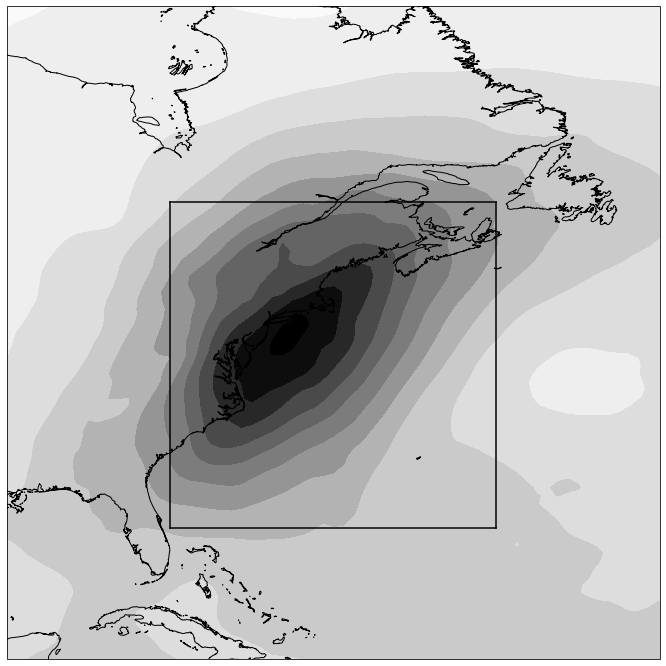

In [252]:
#print(ivt_concat)
ivt_composite=ivt_concat.mean(dim='time',skipna=True)
#ivt_composite=ivt_concat[55]

fig=plt.figure(figsize=(12,12))
ax=plt.subplot(1,1,1,projection=ccrs.PlateCarree())
ax.coastlines(resolution='10m')
ax.set_xlim(-90,-50)
ax.set_ylim(20,60)
ax.plot([-80,-80],[28,48],color='k')
ax.plot([-60,-60],[28,48],color='k')
ax.plot([-80,-60],[28,28],color='k')
ax.plot([-80,-60],[48,48],color='k')

#ax.pcolormesh(ivt_composite.lon,ivt_composite.lat,ivt_composite,vmin=0,vmax=800,cmap=plt.cm.Greys)
ax.contourf(ivt_composite.lon,ivt_composite.lat,ivt_composite,levels=np.arange(0,900,80),extend='max',cmap=plt.cm.Greys)
plt.show()

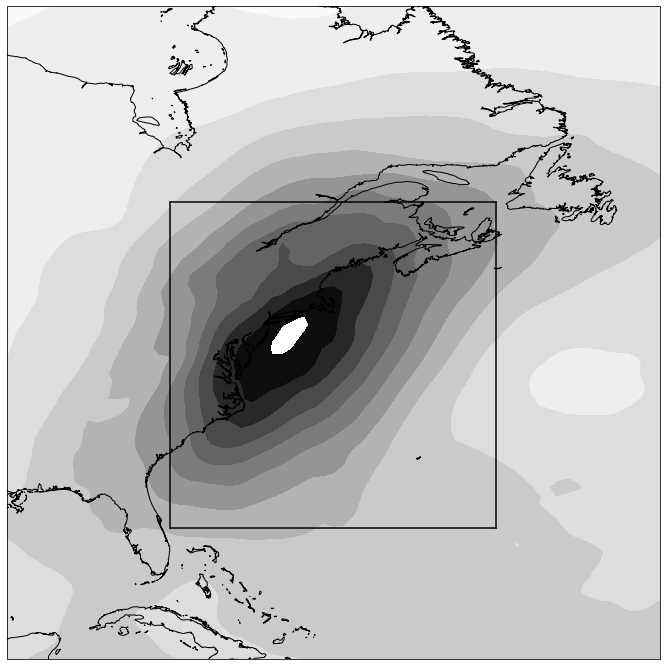

In [257]:
#print(ivt_concat)
ivt_composite=ivt_concat.mean(dim='time',skipna=True)
#ivt_composite=ivt_concat[55]

fig=plt.figure(figsize=(12,12))
ax=plt.subplot(1,1,1,projection=ccrs.PlateCarree())
ax.coastlines(resolution='10m')
ax.set_xlim(-90,-50)
ax.set_ylim(20,60)
ax.plot([-80,-80],[28,48],color='k')
ax.plot([-60,-60],[28,48],color='k')
ax.plot([-80,-60],[28,28],color='k')
ax.plot([-80,-60],[48,48],color='k')

#ax.pcolormesh(ivt_composite.lon,ivt_composite.lat,ivt_composite,vmin=0,vmax=800,cmap=plt.cm.Greys)
ax.contourf(ivt_composite.lon,ivt_composite.lat,ivt_composite,levels=np.arange(0,900,80),cmap=plt.cm.Greys)
plt.show()

In [ ]:
index=1043

fig=plt.figure(figsize=(12,12))
ax=plt.subplot(1,1,1,projection=ccrs.PlateCarree())
ax.coastlines(resolution='10m')
ax.set_xlim(-90,-50)
ax.set_ylim(20,60)
ax.plot([-80,-80],[28,48],color='k')
ax.plot([-60,-60],[28,48],color='k')
ax.plot([-80,-60],[28,28],color='k')
ax.plot([-80,-60],[48,48],color='k')

ax.pcolormesh(blended_sum.lon,blended_sum.lat,blended_sum[index,:,:],vmin=0,vmax=1,cmap=plt.cm.Blues)

plt.show()